<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

<div class="alert alert-block alert-warning">
<b>⚠️ Совет:</b> 

Важно чтобы в проектах было подробное описание: когда потенциальные работодатели будут смотреть твой проект в портфолио, им нужно будет понимать задачу, чтобы можно было оценить её решение. Вот что можно добавить:
    
* Описание целей и задачи проекта
* Описание данных
* План работы

И рекомендую писать введение от первого лица множественного числа. Так работа выглядит более самостоятельной)
</div>

## Подготовка данных

In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

In [228]:
df = pd.read_csv("/datasets/Churn.csv")

display(df.shape)
display(df.head(50)) 

(10000, 14)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


Столбцы содержат следующую информацию: 

RowNumber — индекс строки в данных

CustomerId — уникальный идентификатор клиента

Surname — фамилия

CreditScore — кредитный рейтинг

Geography — страна проживания

Gender — пол

Age — возраст

Tenure — сколько лет человек является клиентом банка

Balance — баланс на счёте

NumOfProducts — количество продуктов банка, используемых клиентом

HasCrCard — наличие кредитной карты

IsActiveMember — активность клиента

EstimatedSalary — предполагаемая зарплата

Exited — факт ухода клиента

In [229]:
df.info()
print('')
print('Количество полных дубликатов:', df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 10000 entries, 0 to 9999

Data columns (total 14 columns):

 #   Column           Non-Null Count  Dtype  

---  ------           --------------  -----  

 0   RowNumber        10000 non-null  int64  

 1   CustomerId       10000 non-null  int64  

 2   Surname          10000 non-null  object 

 3   CreditScore      10000 non-null  int64  

 4   Geography        10000 non-null  object 

 5   Gender           10000 non-null  object 

 6   Age              10000 non-null  int64  

 7   Tenure           9091 non-null   float64

 8   Balance          10000 non-null  float64

 9   NumOfProducts    10000 non-null  int64  

 10  HasCrCard        10000 non-null  int64  

 11  IsActiveMember   10000 non-null  int64  

 12  EstimatedSalary  10000 non-null  float64

 13  Exited           10000 non-null  int64  

dtypes: float64(3), int64(8), object(3)

memory usage: 1.1+ MB



Количество полных дубликатов: 0


В наборе данных есть столбцы RowNumber, Surname и CustomerId. Все они несут идентификационную информацию, которая дублирует информацию стандартной нумерации датафрейма. Кроме этого, в столбце Surname допущены ошибки, так что для экономии времени удалим их за ненадобностью, ведь для исследования они не потребуются.

In [230]:
for_deleting_purposes = ['RowNumber','CustomerId','Surname']

df = df.drop(for_deleting_purposes, axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [231]:
df.isna().sum()

CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

Явно видно, что в столбце Tenure (количество лет проведенных в статусе клиента банка) часто встречаются пропуски. Скорее всего, они возникли из-за того, что люди были клиентами банка менее одного года и система присвоила им значение NaN вместо округленного значения или нуля. Однако, это не единственное предположение - возможно это просто системный сбой и люди с пропусками в столбце Tenure давно являются клиентами Бета-Банка. Считаю, что следует оставить пропуски на текущем значении.

In [232]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Доля объектов положительного класса:

In [233]:
sum(df["Exited"]/len(df))

0.20369999999999389

Доля объектов отрицательного класса:

In [234]:
1-sum(df["Exited"]/len(df))

0.7963000000000061

Видим, что объектов отрицательного класса сильно больше, чем положительного класса

Применим к данным метод OHE для последующей работы с ними

In [235]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


## Исследование задачи

In [236]:
features = df.drop("Exited", axis=1)
target = df["Exited"]
features.fillna(1, inplace=True)

features_train, features_test0, target_train, target_test0 = train_test_split(features, target, 
                                                                              test_size=0.2, 
                                                                              random_state=1)


features_valid, features_test, target_valid, target_test = train_test_split(features_test0, target_test0, 
                                                                              test_size=0.5, 
                                                                              random_state=1)


features_train = pd.DataFrame(features_train)
features_valid = pd.DataFrame(features_valid)
target_train = pd.Series(target_train)
target_valid = pd.Series(target_valid)

Перед этапом обучения стоит масштабировать признаки

In [237]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

scaler = StandardScaler()
scaler.fit(features_train.loc[:, numeric])
features_train.loc[:, numeric] = scaler.transform(features_train.loc[:, numeric])
features_valid.loc[:, numeric] = scaler.transform(features_valid.loc[:, numeric])
features_test.loc[:, numeric] = scaler.transform(features_test.loc[:, numeric])

# Приступим к обучению моделей

Изучим модель Logistic Regression

In [238]:
model = LogisticRegression()
model.fit(features_train, target_train)
predictions = model.predict(features_valid)
print("Accuracy:", accuracy_score(predictions, target_valid))
print("F1:", f1_score(predictions, target_valid))

Accuracy: 0.842

F1: 0.3416666666666667


Изучим модель Random Forest

In [239]:
best_model = None
best_accuracy = 0
best_est = 0
best_depth = 0
best_f1_score = 0


for est in range(10, 51, 5): 
    for depth in range (1, 21): 
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) 
        model.fit(features_train, target_train)
        accuracy = model.score(features_valid, target_valid) 
        predicted_valid = model.predict(features_valid)
        f1 = f1_score(target_valid, predicted_valid)
        if f1 > best_f1_score:
            best_model = model
            best_accuracy = accuracy
            best_est = est
            best_depth = depth
            best_f1_score = f1


print("Accuracy на валидационной выборке:", best_accuracy)
print("Количество деревьев:", best_est)
print("Оптимальная глубина дерева:", best_depth)
print("Лучший F1_score:", best_f1_score)

Accuracy на валидационной выборке: 0.894

Количество деревьев: 15

Оптимальная глубина дерева: 10

Лучший F1_score: 0.6267605633802816


На данном этапе можно сделать вывод, что модель созданная при помощи Random Forest показывает более высокий результат в сравнении с Logistic Regression. Результат F1-меры у Random Forest - 0.62, его можно улучшить, избавившись от дисбаланса классов.

## Борьба с дисбалансом

Применим метод увеличения числа наблюдений положительного класса - Upsampling

In [217]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled_train, target_upsampled_train = upsample(features_train, target_train, 4)

In [218]:
best_model = None
best_accuracy = 0
best_est = 0
best_depth = 0
best_f1_score = 0


for est in range(10, 51, 5): 
    for depth in range (1, 21): 
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) 
        model.fit(features_upsampled_train, target_upsampled_train)
        accuracy = model.score(features_valid, target_valid) 
        predicted_valid = model.predict(features_valid)
        f1 = f1_score(target_valid, predicted_valid)
        if f1 > best_f1_score:
            best_model = model
            best_accuracy = accuracy
            best_est = est
            best_depth = depth
            best_f1_score = f1


print("Accuracy на валидационной выборке:", best_accuracy)
print("Количество деревьев:", best_est)
print("Оптимальная глубина дерева:", best_depth)
print("Лучший F1_score:", best_f1_score)

Accuracy на валидационной выборке: 0.849

Количество деревьев: 45

Оптимальная глубина дерева: 10

Лучший F1_score: 0.6343825665859564


Применив Upsampling - нашел оптимальное значение F1-меры у модели равное 0.634

Попробуем способ изменения веса редкого класса 

In [219]:
best_model = None
best_accuracy = 0
best_est = 0
best_depth = 0
best_f1_score = 0

for est in range(10, 51, 5): 
    for depth in range (1, 21): 
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, class_weight='balanced') 
        model.fit(features_train, target_train)
        accuracy = model.score(features_valid, target_valid) 
        predicted_valid = model.predict(features_valid)
        f1 = f1_score(target_valid, predicted_valid)
        
        if f1 > best_f1_score:
            best_model = model
            best_accuracy = accuracy
            best_est = est
            best_depth = depth
            best_f1_score = f1
print("Accuracy на валидационной выборке:", best_accuracy)
print("Количество деревьев:", best_est)
print("Оптимальная глубина дерева:", best_depth)
print("Лучший F1_score:", best_f1_score)

Accuracy на валидационной выборке: 0.865

Количество деревьев: 30

Оптимальная глубина дерева: 10

Лучший F1_score: 0.6419098143236075


После применения этого способа получили лучшую F1-меру - 0.641

На данном этапе применил два способа борьбы с дисбалансом - Upsampling и изменение веса редкого класса. Более успешным оказался второй способ.

## Тестирование модели

Протестируем модель с изменением веса редкого класса

In [223]:
best_accuracy = 0
best_f1_score = 0
best_threshold = 0
threshold = 0.5

model = RandomForestClassifier(random_state=12345, n_estimators=30, max_depth=10,
                               class_weight='balanced')
model.fit(features_train, target_train)    
probabilities_test = model.predict_proba(features_test) 
probabilities_one_test = probabilities_test[:, 1] 
predicted_test = probabilities_one_test > threshold 
f1 = f1_score(target_test, predicted_test) 
accuracy = accuracy_score(target_test, predicted_test) 

print("Оптимальные гипермараметры модели: Порог = {:.2f} / Accuracy = {:.3f}, F1_score = {:.3f}"
      .format(threshold, accuracy, f1))

Оптимальные гипермараметры модели: Порог = 0.50 / Accuracy = 0.830, F1_score = 0.621


Видим, что модель проходит тест на адекватность c 30 деревьями, глубиной 10 и порогом 0.5 по accuracy (0,830 > 0,79) и проходит проверку f1_score (0.621 > 0,59)

Построим ROC-AUC кривую и вычислим значение площади

roc_auc_score = 0.8705408643180407


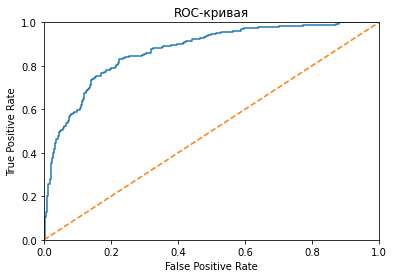

In [240]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

print('roc_auc_score =', roc_auc_score(target_test, probabilities_one_test))

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

По графику видно, что значение roc_auc - более чем подходящее

## Вывод

Провели подготовку данных: удалили лишние признаки, заполнили пропуски, масштабировали численные признаки, применили технику OHE для категориальных признаков

Исследовали баланс классов, обучили модель без учета дисбаланса.  Наиболее точной оказалась модель Random Forest с значением F1-меры = 0.62.

Отталкиваясь от дисбаланса классов (80:20) - произвели upsampling положительного класса и способ с изменением веса редкого класса. Вторым способом удалось повысить F1 до 0.641. Upsampling оказался менее эффективен.